### DECISSION TREES EXERCISE
A) Find some data here [DATA.gif] on people. The goal is to decide if someone buys a computer or not. Derive the best decision tree by calculating a little by hand (Shannon). At least the first split.

B) Compare your tree against the tree derived from SciKit Learn as given in the Python example before! Why are they different? Print the tree with Graphviz (can be easily done with WebGraphViz

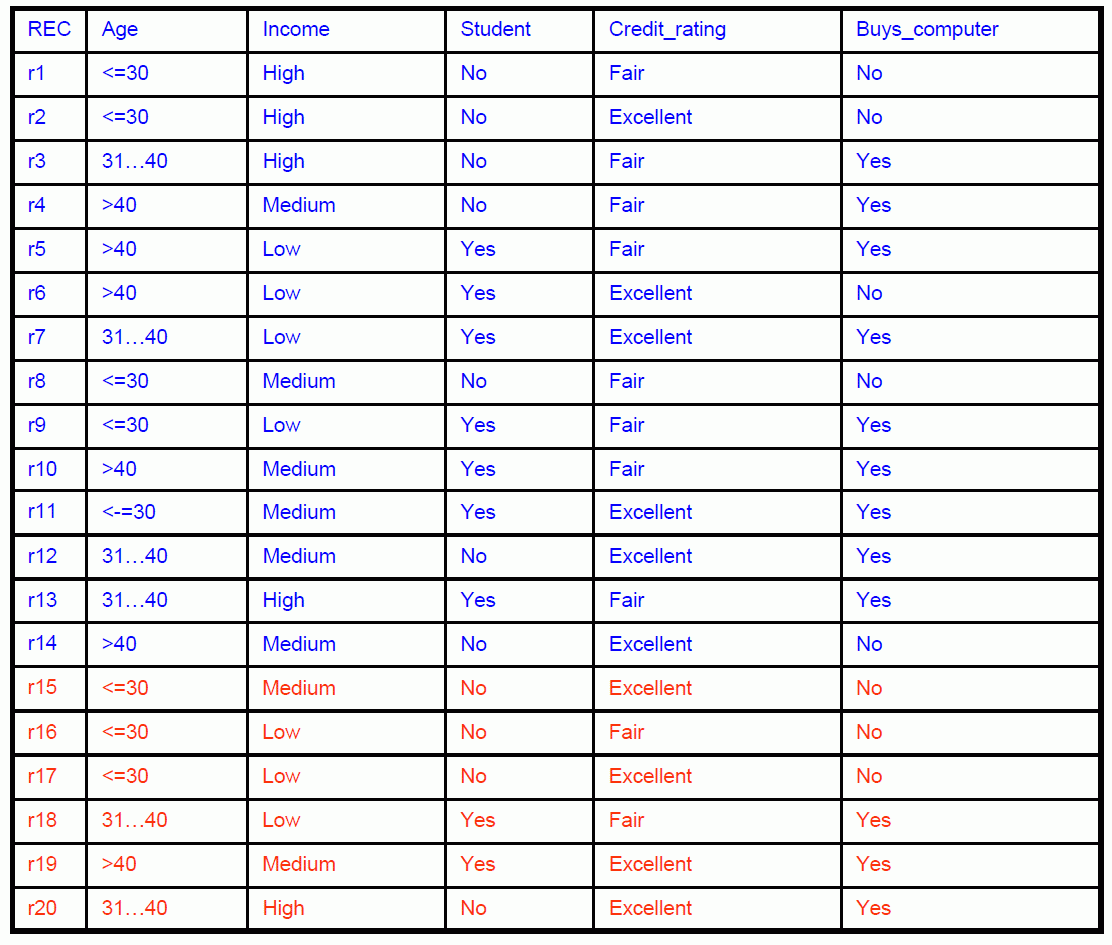

In [249]:
from IPython.display import Image
Image('DATA.png', width=640)

#### Optain data from image:

In [5]:
from PIL import Image
import pytesseract

In [21]:
print(pytesseract.image_to_string(Image.open('DATA.png')))

a
a
fa [xe Psi eee
a
fe [ee Pee eee

 



In [178]:
import pandas as pd
import numpy as np
import math

In [179]:
#cols = ['REC', 'Age', 'Income', 'Student', 'Credit_rating', 'Buys_computer']
rec = ["r"+str(i) for i in range(1, 21)]
age = ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40",  "31...40", ">40", "<=30", "<=30", "<=30", "31...40", ">40", "31...40"]
inc = ["High", "High","High", "Medium", "Low", "Low","Low", "Medium", "Low", "Medium", "Medium", "Medium", "High", "Medium", "Medium", "Low", "Low", "Low","Medium", "High"]
stu = ["No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No"]
cre = ["Fair", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Fair", "Fair", "Excellent", "Excellent", "Fair", "Excellent", "Excellent", "Fair", "Excellent", "Fair", "Excellent", "Excellent"]
buy = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "No", "Yes", "Yes", "Yes"]
data = {'REC': rec, 'Age': age, 'Income': inc, 'Student': stu, 'Credit_rating': cre, 'Buys_computer': buy}
df = pd.DataFrame(data)

#### A) Calculate entropy and gain for two attributes (first split) by hand

In [180]:
df_buy = df.groupby(['Buys_computer']).count()[['REC']]

In [181]:
df_buy

,REC
Buys_computer,
No,8
Yes,12


$\textbf{E}(BuysComputer) = \textbf{E}(8,12) = \textbf{E}(0.4,0.6) = -(math.log2(0.4)*0.4)-(math.log2(0.6)*0.6) = \textbf{0.97}$

In [155]:
df_income = df.groupby(['Income', 'Buys_computer']).count()[['REC']].unstack()

In [156]:
df_income

REC    
Buys_computer  No Yes
Income               
High            2   3
Low             3   4
Medium          3   5

$\textbf{E}(BuysComputer, Income) = \textbf{P}(High)*\textbf{E}(2,3) + \textbf{P}(Medium)*\textbf{E}(3,5) + \textbf{P}(Low)*\textbf{E}(3,4) = (5/20)*0.97 + (8/20)*0.954 + (7/20)*0.985 = \textbf{0.969} $

$\textbf{Gain}(BuysComputer, Income) = \textbf{E}(BuysCumputer)-\textbf{E}(BuysCumputer, Income) = 0.97 - 0.969 = \textbf{0.001}$

#### B) SciKit Learn Python example
- Q1: Compare your tree against the SciKit Learn tree. 
- A1: Comparing the values of the calculation and the tree show very different results.
- Q2: Why are they different? 
- A2: They use a different methode. Question A) was asking for some calculation methode, so I used the "Information Gain" methode. The SciKit Learn methode uses (by default) the "Gini Index" methode.
- Q3: Print the tree with Graphviz (can be easily done with WebGraphViz).
- A3: Please, see image below.

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [236]:
df['age'] = df['Age'].factorize()[0]
df['income'] = df['Income'].factorize()[0]
df['student'] = df['Student'].factorize()[0]
df['credit_rate'] = df['Credit_rating'].factorize()[0]
df['buys'] = df['Buys_computer'].factorize()[0]

In [238]:
X = df[['age', 'income', 'student', 'credit_rate']]
y = df.buys

In [239]:
tree_clf = DecisionTreeClassifier(max_depth=20)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [246]:
export_graphviz(
    tree_clf,
    out_file="customer_prediction_tree.dot",
    feature_names=['age', 'income', 'student', 'credit_rate'],
    class_names=['No', 'Yes'],
    rounded=True,filled=True)

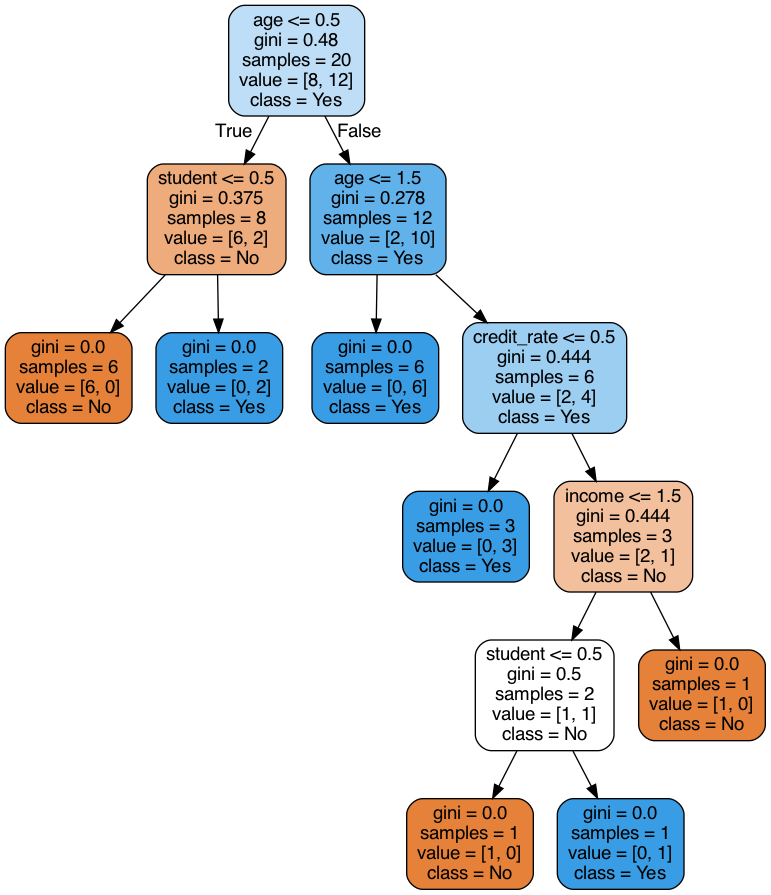

In [248]:
from IPython.display import Image
Image('tree.png', width=640)